# **CS 418 Final Project Analysis Post Progress Report Team Rose Matcha**

**Sherwin Tahernezhadi, Filip Toloczko, Kevin Jara, Brenda Leyva, Andy Wang**

Note that many of the information contained here is in relation to the progress report. This updated analysis seeks to explore some of the new methods we are implementing since the progress report. 


### **Project Introduction**

For this project, we are analyzing data relevant to predicting the obesity of individuals by analyzing various health and lifestyle factors. To accomplish this, we are using two datasets: Our first, and primary, dataset from the CDC consists of roughly 250,000 instances of a variety of health indicators such as gender, age, BMI, smoker status, etc. The main population for this dataset is individuals residing in the United States. As for our second dataset, we wanted to observe how the obesity prediction and the factors leading to its prediction may be similar or different for another population compared to the US. As such, we found a dataset consisting of roughly 2100 instances of a variety of health indicators for individuals residing in the Latin American countries of Mexico, Peru, and Colombia. In terms of our goals, we aim to answer the question of how accurately we can quantify the prediction of obesity in these two countries, which features/predictors are the most influential to predicting obesity in each dataset, and between the two datasets/populations what similarities and differences are there regarding the prediction of obesity and the most significant factors in terms of predicting obesity. 

### **Any Changes**

Since our initial proposal, we have refined our project scope to focus on predicting obesity rather than both obesity and diabetes. This change was advised after discussing with our professor and determining that diabetes prediction would be challenging without labeled diabetes data in our secondary dataset (since the secondary dataset has no diabetes feature). In addition, we have integrated a secondary dataset containing information on obesity in Latin American individuals, which will allow us to observe the prediction of obesity across diverse demographics. 

### **Data Cleaning**

For this step, there are two datasets that need to be cleaned. We will begin by cleaning the CDC health indicators dataset and then we will clean the dataset for the latin american individuals. 

##### **1. CDC dataset cleaning**

As can be seen below, not too many steps need to be taken to clean the CDC data. There are no missing values in the dataset to address. Note that we do not have a feature for obesity yet with two levels (obese/non obese), so we will create that feature in this step using the fact that an obese individual is defined to have a BMI of at least 30. 

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
display(df.head())
print(df.shape)
print(df.dtypes)
print(f'Number of null values in the dataset: {df.isnull().sum().sum()}')

df['Obese'] = np.where(df['BMI'] >= 30, 1, 0)
display(df.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


(253680, 22)
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
Number of null values in the dataset: 0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Obese
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


##### **2. Latin American Individuals Data Cleaning**

For this dataset, there is more cleaning that needs to be done relative to the CDC dataset. For one, some columns in this dataset, like FAVC or FCVC, are quite ambiguous in terms of what they represent, so we will rename these columns to make their meaning more evident. Also, many of our feature variables have values with categorical labels, like "Sometimes", "Always", or "Yes"/"No". It is critical that we encode these categorical features with numeric integer values to indicate their levels to get the most optimal results for when we fit machine learning models to our dataset. Similarly to the CDC dataset, we also create the obesity feature from BMI, and we create BMI from the definition that BMI is the weight in kilograms divided by the square of the height in meters. We have features for both weight (kg) and height (meters), so we will be able to create a BMI feature from this. 

In [2]:
df_latin = pd.read_csv('latin_america_obesity.csv')
display(df_latin.head())
print(df_latin.dtypes)

# Many of the columns in this dataset do not have very meaningful column names, so we are renaming them
df_latin.rename(columns = {'FAVC' : 'eat_high_caloric', 'FCVC' : 'eat_vegetables', 'NCP' : 'num_meals_per_day', 'CAEC' : 'food_between_meals', 'CH2O' : 'water_per_day', 'FAF' : 'physical_activity', 
                           'TUE' : 'technology_usage', 'CALC' : 'alcohol_consumption', 'MTRANS' : 'transportation_method', 'SCC' : 'calories_per_day'}, inplace = True)
df_latin.head()


# Here, we encode the categorical features with numeric integer values to indicate their levels.
df_latin['Gender'] = df_latin['Gender'].replace({'Female' : 0, 'Male' : 1})
df_latin['family_history_with_overweight'] = df_latin['family_history_with_overweight'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['eat_high_caloric'] = df_latin['eat_high_caloric'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['SMOKE'] = df_latin['SMOKE'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['calories_per_day'] = df_latin['calories_per_day'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['food_between_meals'] = df_latin['food_between_meals'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}).astype(int)
df_latin['alcohol_consumption'] = df_latin['alcohol_consumption'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}).astype(int)
df_latin['transportation_method'] = df_latin['transportation_method'].replace({'Bike' : 1, 'Motorbike' : 2, 'Walking' : 3, 'Automobile' : 4, 'Public_Transportation' : 5})


'''For this dataset, we do not have features for BMI or Obesity. We will need to create them manually, 
   so create BMI from its definition of weight/(height^2) and create Obese feature from the definition that an Obese individual has a BMI of at least 30'''
df_latin['BMI'] = round(df_latin['Weight'] / (df_latin['Height'] ** 2), 1)
df_latin['Obese'] = np.where(df_latin['BMI'] >= 30, 1, 0)

'''remove the previous obesity column since we create the binary obesity column based off the value of BMI. 
   This is to ensure consistency in how we determine the obesity feature between the two datasets.'''
df_latin = df_latin.drop('NObeyesdad', axis = 1) 
display(df_latin.head())
print(df.dtypes)
print(df.shape)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


C:\Users\taher\AppData\Local\Temp\ipykernel_56744\827553600.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_latin['Gender'] = df_latin['Gender'].replace({'Female' : 0, 'Male' : 1})
C:\Users\taher\AppData\Local\Temp\ipykernel_56744\827553600.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_latin['family_history_with_overweight'] = df_latin['family_history_with_overweight'].replace({'yes' : 1, 'no' : 0}).astype(int)
C:\Users\taher\AppData\Local\Temp\ipykernel_56744\827553600.py:14: FutureWarning: Downcasting behavior 

,Gender,Age,Height,Weight,family_history_with_overweight,eat_high_caloric,eat_vegetables,num_meals_per_day,food_between_meals,SMOKE,water_per_day,calories_per_day,physical_activity,technology_usage,alcohol_consumption,transportation_method,BMI,Obese
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,5,24.4,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,5,24.2,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,5,23.8,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,26.9,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,5,28.3,0


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
Obese                     int64
dtype: object
(253680, 23)


### **Exploratory Data Analysis**

We perform EDA on both datasets. 

##### **1. CDC dataset EDA**

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Obese
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.346306
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.475793
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000



Percentage of non-obese individuals in the dataset: 65.369%
Percentage of obese individuals in the dataset: 34.631%


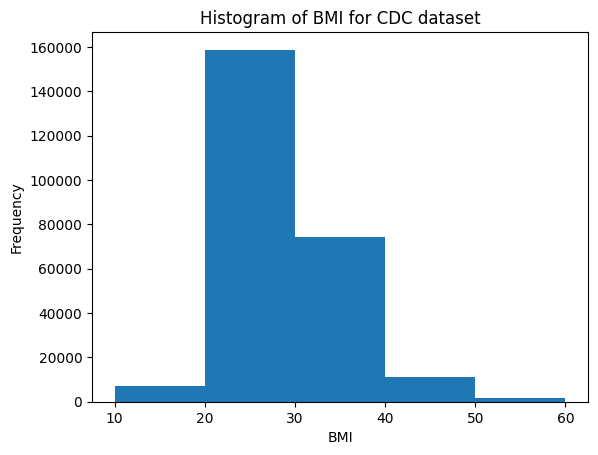

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get summary statistics for each feature in the dataframe
display(df.describe())

# Get a visualization of the BMI feature for EDA purposes
BMI = df['BMI']
bins = [10, 20, 30, 40, 50, 60]
plt.hist(BMI, bins = bins)
plt.title("Histogram of BMI for CDC dataset")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Find the proportion of non-obese and obese individuals in the CDC dataset
non_obese = df.loc[df['Obese'] == 0, 'Obese']
obese = df.loc[df['Obese'] == 1, 'Obese']
print(f'\nPercentage of non-obese individuals in the dataset: {round(((len(non_obese) / len(df)) * 100), 3)}%')
print(f'Percentage of obese individuals in the dataset: {round(((len(obese) / len(df)) * 100), 3)}%')

In terms of our data, the majority of our feature variables seem to binary because as seen in the summary statistics for the dataframe, there are many columns such as HighBP, highChol, etc which have a maximum value of 1.0 which indicates that the feature takes on values between 0 and 1. In the context of the data, this means that for a given individual, for highBP for instance, they either have high blood pressure or they do not. In this EDA, since our goal is to predict obesity and obesity arises directly from BMI, we wanted to do some exploration into the BMI feature. To do this, we created the above histogram and as seen in the histogram the majority of individuals have a BMI between 20-30 with another smaller peak around BMI 30-40. From the histogram, the distribution for BMI appears to be slightly skewed to the right, and this would make sense given the above summary statistics for each feature in the dataframe, as for the BMI feature the maximum value was 98 which is a pretty significant outlier which could likely skew the distribution of BMI towards higher values. 

Since we are trying to predict obesity, we also wanted to gain some insight into our feature variable "Obese". As such, we found the proportion of each class of obese (i.e. obese/not obese) in the obesity feature. What we found was that roughly 65% of the individuals in our dataset are not obese and 35% are obese. These proportions may pose an issue when fitting our machine learning models, as to ensure the most optimal prediction we want the proportion of the two classes to be roughly equal, so around 50% for each class. We will need to address this data imbalance issue upon fitting our machine learning models. 

##### **2. Latin America Dataset EDA**

,Gender,Age,Height,Weight,family_history_with_overweight,eat_high_caloric,eat_vegetables,num_meals_per_day,food_between_meals,SMOKE,water_per_day,calories_per_day,physical_activity,technology_usage,alcohol_consumption,transportation_method,BMI,Obese
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,4.701563,29.700284,0.461866
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.577618,8.011220,0.498662
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,4.000000,24.300000,0.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,5.000000,28.700000,0.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,5.000000,36.000000,1.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,50.800000,1.000000



Percentage of non-obese individuals in the dataset: 53.813%
Percentage of obese individuals in the dataset: 46.187%
transportation_method
5    1580
4     457
3      56
2      11
1       7
Name: count, dtype: int64


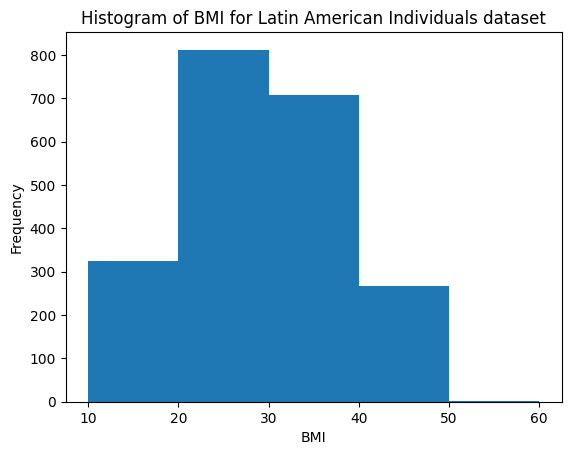

In [4]:
display(df_latin.describe())

BMI = df_latin['BMI']
bins = [10, 20, 30, 40, 50, 60]
plt.hist(BMI, bins = bins)
plt.title("Histogram of BMI for Latin American Individuals dataset")
plt.xlabel("BMI")
plt.ylabel("Frequency")

non_obese_latin = df_latin.loc[df_latin['Obese'] == 0, 'Obese']
obese_latin = df_latin.loc[df_latin['Obese'] == 1, 'Obese']

print(f'\nPercentage of non-obese individuals in the dataset: {round(((len(non_obese_latin) / len(df_latin)) * 100), 3)}%')
print(f'Percentage of obese individuals in the dataset: {round(((len(obese_latin) / len(df_latin)) * 100), 3)}%')

print(df_latin['transportation_method'].value_counts())


For this dataset on individuals in Latin America, we performed a similar EDA as we did to individuals in the CDC dataset. As seen in the above summary statistics for the dataset, similarly to the CDC dataset there are many features with a maximum value of 1 indicating that those are binary features, like eat_high_caloric which represents whether or not an individual eats high calorie food. Another interesting finding is that there are a few features, such as transporation_method, which have a maximum value of 5. This indicates that those features have multiple labels contrary to the simple 0 or 1 to indicate "yes"/"no" for a lot of our features. 

Similarly to our EDA on the CDC dataset, we also wanted to explore BMI feature in this latin american dataset. As such, we created a visualization of the distribution of BMI through the above histogram where we observe that the majority of individuals have a BMI between 20-30 with a slighly smaller peak at BMI 35-40. Additionally, the distribution appears to be more normally distributed relative to the BMI distribution in the CDC dataset. 

Since we are trying to predict obesity for latin american individuals as well, we also wanted to gain some insight into our feature variable "Obese". As such, we found the proportion of each class of obese (i.e. obese/not obese) in the obesity feature. What we found was that roughly 54% of the individuals in our dataset are not obese and 46% are obese, which indicates that the proportions for each class are roughly equal. This is ideal for our when we have to fit our machine learning models as we will not need to address data imbalance issues with this population, contrary to the CDC dataset population. 

### **Visualization (at least 1)**

For our visualization, we would like to visualize the link between the income of an individual and their BMI from the CDC dataset. The hypothesis we had going into this was that a higher income would result in a lower BMI on average. This is because a higher income typically results in more access to healthy food as well as better medical access, likely reducing the chances of medical obesity.

c:\Users\taher\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\taher\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\taher\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\taher\AppData\Local\Programs\Python\Python311\Lib\site-p

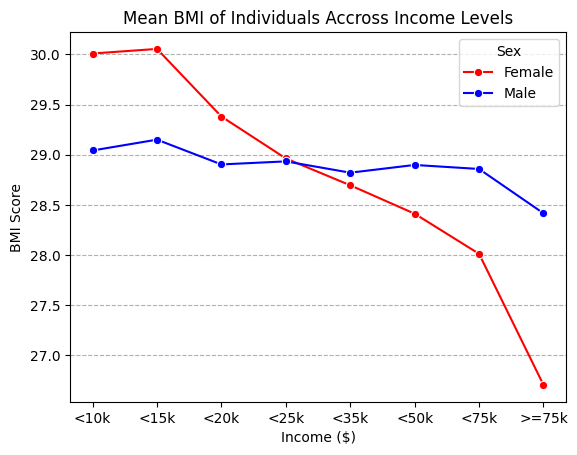

In [5]:
#create a lineplot using data from the dataframe, with income on the x axis and BMI on the y axis
sns.lineplot(data = df, marker = 'o', x = 'Income', y = 'BMI', hue = 'Sex', estimator = np.mean, errorbar = None, palette=['red', 'blue'])
plt.grid(linestyle = '--', axis = 'y', which = 'major')

#create a title and labels
plt.title("Mean BMI of Individuals Accross Income Levels")
plt.ylabel("BMI Score")
plt.xlabel("Income ($)")

#create a legend for the graph
plt.legend(title = 'Sex', loc = 'upper right', bbox_to_anchor=(1, 1), labels = ["Female", "Male"])

#rename the income levels to meaningful labels
plt.xticks([1,2,3,4,5,6,7,8], ['<10k', '<15k', '<20k', '<25k', '<35k', '<50k', '<75k','>=75k'])

plt.show()

This was an interesting hypothesis to test, as the income of an individual seemingly has a positive relationship with BMI. The higher an individual's income, the lower their BMI on average. While this is true accross both sexes, it seemed to have a bigger impact on women. The impact on men is also apparent, with a clear downward trajectory, but with a much lower rate of change relative to women.

In summary the results of this graph show a relationship between income and obesity across both men and women in our CDC dataset.

### **ML Analysis (At least 1)**

For this, we will perform an ML analysis on both the CDC and latin america datasets. 

##### **1. CDC Dataset ML Analysis**

We will first try to predict obesity using the features from the CDC dataset. Since we are predicting a binary outcome, we will use classifcation ML models, such as logistic regression and a decision tree classifier. 
Note that we will use 75% of our data for training and 25% for testing. Note that for all methods/models, we set a seed (i.e random_state) to be 125 in order to ensure the reproducibility of our results. See below for output and subsequent interpretation. 

##### **Logistic Regression**

0        0
1        1
2        0
3        0
4        0
        ..
63415    0
63416    0
63417    0
63418    0
63419    0
Name: Predicted values of Obesity target feature from CDC dataset, Length: 63420, dtype: int64

The accuracy of the logistic regression model on predicting obesity in the CDC dataset is: 0.6587038789025544


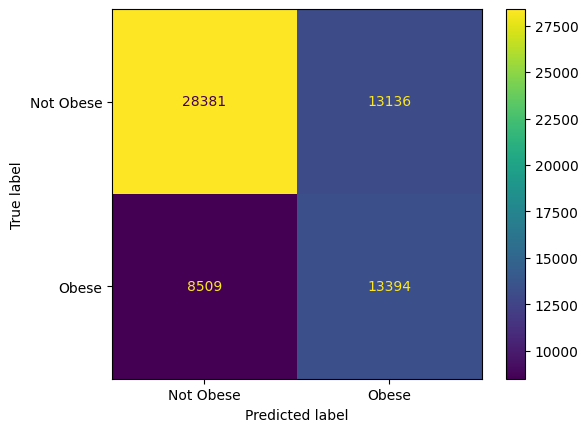

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_cdc = df.drop(columns = ['BMI', 'Obese'])
y_cdc = df[['Obese']]

X_train_cdc, X_test_cdc, y_train_cdc, y_test_cdc = train_test_split(X_cdc, y_cdc, test_size = 0.25, random_state = 125)

scaler = StandardScaler()
X_train_cdc = scaler.fit_transform(X_train_cdc)
X_test_cdc = scaler.transform(X_test_cdc)

logistic_regression_model_cdc = LogisticRegression(class_weight = 'balanced', random_state=125) # Set class_weight to balanced to try and address the data imbalance issues in the Obese target feature
logistic_regression_model_cdc.fit(X_train_cdc, np.ravel(y_train_cdc))

predictions_logistic_cdc = logistic_regression_model_cdc.predict(X_test_cdc)
predictions_logistic_cdc_series = pd.Series(predictions_logistic_cdc, name = "Predicted values of Obesity target feature from CDC dataset")
display(predictions_logistic_cdc_series)

conf_matrix_logistic = confusion_matrix(y_test_cdc, predictions_logistic_cdc)
display_conf_matrix = ConfusionMatrixDisplay(conf_matrix_logistic, display_labels=["Not Obese", "Obese"])
display_conf_matrix.plot()

logistic_cdc_accuracy = logistic_regression_model_cdc.score(X_test_cdc, y_test_cdc)
print(f'The accuracy of the logistic regression model on predicting obesity in the CDC dataset is: {logistic_cdc_accuracy}')

##### 

As can be seen from this, our logistic regression model for the CDC dataset has roughly 65.87% accuracy in predicting obesity in individuals from the CDC dataset based on all feature variables of the CDC dataset regardless of BMI and Obese 
(Since Obese is our target feature and arises directly from BMI). If we assume the baseline accuracy to be 50%, then our logistic regression model is roughly 15.87% better in predicting obesity relative to the baseline. 

##### **Decision Tree Classifier**

0        0
1        0
2        0
3        0
4        1
        ..
63415    1
63416    0
63417    1
63418    1
63419    0
Name: Predicted values of Obesity target feature from CDC dataset, Length: 63420, dtype: int64

The accuracy of the decision tree classiifer model on predicting obesity in the CDC dataset is: 0.6069694102806685


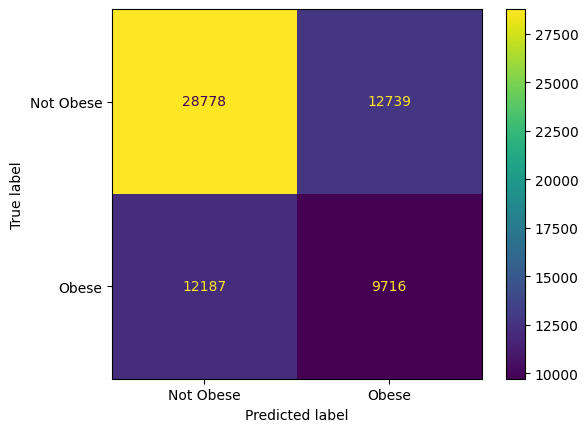

In [7]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model_cdc = DecisionTreeClassifier(class_weight= 'balanced', random_state=125)
decision_tree_model_cdc.fit(X_train_cdc, np.ravel(y_train_cdc))

predictions_tree_cdc = decision_tree_model_cdc.predict(X_test_cdc)
predictions_tree_cdc_series = pd.Series(predictions_tree_cdc, name = "Predicted values of Obesity target feature from CDC dataset")
display(predictions_tree_cdc_series)

conf_matrix_tree = confusion_matrix(y_test_cdc, predictions_tree_cdc)
display_conf_matrix = ConfusionMatrixDisplay(conf_matrix_tree, display_labels=["Not Obese", "Obese"])
display_conf_matrix.plot()

decision_tree_accuracy = decision_tree_model_cdc.score(X_test_cdc, y_test_cdc)
print(f'The accuracy of the decision tree classiifer model on predicting obesity in the CDC dataset is: {decision_tree_accuracy}')

As can be seen from this, our decision tree classifier model for the CDC dataset has roughly 60.69% accuracy in predicting obesity in individuals from the CDC dataset based on all feature variables of the CDC dataset regardless of BMI and Obese. If we assume the baseline accuracy to be 50%, then our decision tree classifier model is roughly 10.69% better in predicting obesity relative to the baseline. This decision tree classifer also performs slightly worse than the logistic regression model in terms of accuracy in predicting obesity in individuals from the CDC dataset since the logistic regression model had a slightly higher accuracy of roughly 65.87%. 

All in all, in terms of predicting obesity for the CDC dataset, our current accuracy metrics for logistic regression and decision tree classifier are between roughly 60-66%. As a result, there may be more techniques to explore like K-fold cross validation to try and see if we can improve the accuracy metric in order to gain a better prediction of obesity. 

##### **2. Latin America Dataset ML Analysis**

##### **Logistic Regression**

0      1
1      1
2      1
3      1
4      1
      ..
523    0
524    1
525    1
526    0
527    0
Name: Predicted values of Obesity target feature from Latin dataset, Length: 528, dtype: int64

The accuracy of the logistic regression model on predicting obesity in the Latin dataset is: 0.9943181818181818


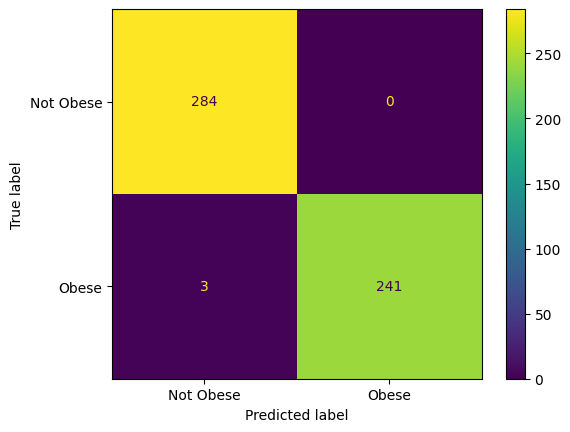

In [8]:
X_latin = df_latin.drop(columns = ['BMI', 'Obese'])
y_latin = df_latin[['Obese']]

X_train_latin, X_test_latin, y_train_latin, y_test_latin = train_test_split(X_latin, y_latin, test_size = 0.25, random_state = 125)

scaler = StandardScaler()
X_train_latin = scaler.fit_transform(X_train_latin)
X_test_latin = scaler.transform(X_test_latin)

logistic_regression_model_latin = LogisticRegression(class_weight = 'balanced', random_state=125) # Set class_weight to balanced to try and address the data imbalance issues in the Obese target feature
logistic_regression_model_latin.fit(X_train_latin, np.ravel(y_train_latin))

predictions_logistic_latin = logistic_regression_model_latin.predict(X_test_latin)
predictions_logistic_latin_series = pd.Series(predictions_logistic_latin, name = "Predicted values of Obesity target feature from Latin dataset")
display(predictions_logistic_latin_series)

conf_matrix_logistic = confusion_matrix(y_test_latin, predictions_logistic_latin)
display_conf_matrix = ConfusionMatrixDisplay(conf_matrix_logistic, display_labels=["Not Obese", "Obese"])
display_conf_matrix.plot()

logistic_latin_accuracy = logistic_regression_model_latin.score(X_test_latin, y_test_latin)
print(f'The accuracy of the logistic regression model on predicting obesity in the Latin dataset is: {logistic_latin_accuracy}')

As can be seen from this, our logistic regression model for the latin america dataset has roughly 99.43% accuracy in predicting obesity in individuals from latin american countries based on all feature variables of the latin america dataset regardless of BMI and Obese. If we assume the baseline accuracy to be 50%, then our logistic regression model is roughly 49.43% better in predicting obesity relative to the baseline. Evidently, our logistic regression model performs very well in predicting obesity in latin american individuals given the high accuracy score of 99.43%. 

##### **Decision Tree Classifier**

0      1
1      1
2      1
3      1
4      1
      ..
523    0
524    1
525    1
526    0
527    0
Name: Predicted values of Obesity target feature from Latin dataset, Length: 528, dtype: int64

The accuracy of the decision tree classiifer model on predicting obesity in the Latin dataset is: 0.9886363636363636


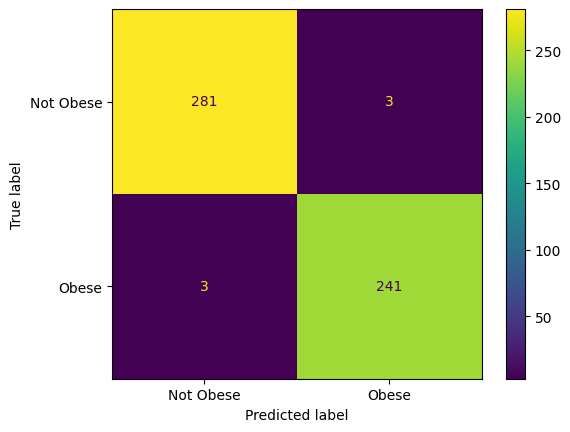

In [9]:
decision_tree_model_latin = DecisionTreeClassifier(class_weight= 'balanced', random_state=125)
decision_tree_model_latin.fit(X_train_latin, np.ravel(y_train_latin))

predictions_tree_latin = decision_tree_model_latin.predict(X_test_latin)
predictions_tree_latin_series = pd.Series(predictions_tree_latin, name = "Predicted values of Obesity target feature from Latin dataset")
display(predictions_tree_latin_series)

conf_matrix_tree = confusion_matrix(y_test_latin, predictions_tree_latin)
display_conf_matrix = ConfusionMatrixDisplay(conf_matrix_tree, display_labels=["Not Obese", "Obese"])
display_conf_matrix.plot()

decision_tree_accuracy = decision_tree_model_latin.score(X_test_latin, y_test_latin)
print(f'The accuracy of the decision tree classiifer model on predicting obesity in the Latin dataset is: {decision_tree_accuracy}')

As can be seen from this, our decision tree classifier model for the latin america dataset has roughly 98.86% accuracy in predicting obesity in individuals from the latin america dataset based on all feature variables regardless of BMI and Obese. If we assume the baseline accuracy to be 50%, then our decision tree classifier model is roughly 48.86% better in predicting obesity relative to the baseline. This decision tree classifer also performs slightly worse than the logistic regression model in terms of accuracy in predicting obesity in individuals from the latin america dataset since the logistic regression model had a slightly higher accuracy of roughly 99.43%. WIth that said, however, the decision tree classifier is very accurate in predicting obesity of latin american individuals given its high accuracy score of roughly 98.86%.  

### **Reflection**

- **What is the hardest part of the project that you've encountered so far?**
    
    So far, the hardest part of the project that our team has encountered has been to address the data imbalance issues from our CDC dataset. Essentially, when we try to fit our machine learning models, such as logistic regression, in order to obtain the best possible accuracy it is key to have the distribution of each class of a given feature be as close to equally distributed as possible. In our case, for our target feature "Obese", we would like the proportion of non-obese and obese individuals to be roughly 50% each, though in reality around 65% of our data from the CDC dataset is non obese and 35% is obese. This was a significant issue we encountered as our models will be more likely to predict instances of non-obese individuals given that the majority of individuals are not obese in the CDC dataset. As such, we took note of this being the hardest part of the project and attempted to address it by specifying a class_weight parameter when defining our logistic regression model. We aim to address this further for our final presentation and report, in which we will employ more methods to combat this issue of data imbalance, such as undersampling the majority class and then refitting the model as such, but all in all it is clear that the data imbalance issue is the hardest part of the project we have encountered so far. 

- **What are your initial insights?**

    While working on this project, we have found out several things about our CDC data. First of all, we have found that some links we expected to be present were not, while on the other hand we discovered some links that we did not expect to be present. Most of the big insights which we have gained have to do with the links connecting individuals to obesity. Our data contains BMI scores for each individual, which we can then convert to an obesity score based on if the BMI is above 30 or not. We have found that the expected links are there, for example,  a higher income leading to lower BMIs on average. Additionally, between our two datasets we have also found out that the proportion of obese individuals are not the same with the latin america dataset having, relative to dataset size, a higher proportion of obese individuals compared to the CDC dataset. 

- **Are there any concrete results that you can show at this point? If not, why not?**

    As of right now, there are not necessarily any concrete results that we can show. While we have come up with a few visualtizations and machine learning models to better understand both our CDC and Latin America datasets as it pertains to predicting obesity, we have not yet been able to come up with robust enough procedures/models that we feel comfortable in showing concrete results. For instance, for our logistic regression and decision tree machine learning models, we did not employ K-fold cross validation nor use additional techniques to address the data imbalance issues in the "Obese" feature for CDC dataset (like undersampling majority class). As such, in the CDC dataset our accuracy metric for predicting obesity is between 60-66% depending on our usage of decision tree/logistic regression, and we feel that we can obtain a better accuracy rate through the techniques we did not employ just yet as mentioned above. Once we address that, it is much more likely that we can show a concrete result in terms of predicting obesity based on various factors. 

- **Going forward, what are the current biggest problems you’re facing?**
    Our biggest challenges at this stage are as follows:

    Handling Class Imbalance: With a higher proportion of non-obese individuals in the CDC dataset, there’s a risk that our model may become biased towards predicting the majority class. We plan to experiment with resampling techniques or adjusting class weights in the model to address this. 

    Integrating the Secondary Dataset: The Latin American dataset includes unique features and categorical variables not present in the CDC data. We must find the shared features between these two datasets and perhaps create the models based on only those shared features. 

    Model Selection and Evaluation: Identifying the most suitable model for our data and accurately assessing its performance

- **Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**
    
    We are currently on track with the project, and have met all of the milestones we have set for ourselves. This includes having created some useful visualizations of the data, having finished our first machine learning model. We also have begun creating more with the goal of improved accuracy, and also trying to understand which specific feature variables are most significant/most important in terms of predicting obesity. 

- **Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?**
    
    Given our initial exploration of the data it is worth proceeding with our project. Both datasets have many features that could reasonably predict obesity and especially in our second dataset since there are not any class balance issues our data is already very geared towards fitting our ML models. Consequently, we are on the right track in terms of predicting obesity in both datasets and we will be able to do further analysis such as determining which of the features are most important/statistically significant in predicting obesity across both datasets. 





### **Next Steps**

The next steps for us will be exploring how to improve the accuracy of our ML models in predicting obesity on the CDC dataset, given we only had between 60-66% accuracy in predicting obesity based on our current models. As such, we may also explore using different kinds of models, like a support vector machine, to see if those models give us a better accuracy score. Using our latin america dataset we can also check if the same factors that are significant in contributing to obesity in the Latin American Community are the same as the CDC dataset. After getting the results from the models as well as other statistical analyses we can make conclusions on whether our project achieved the goals that we set for it based on how well we were able to carry out our objective. That is, how well did we do in coming up with a model to accurately predict obesity in both datasets. How well did we do in finding specific features that are important for predicting obesity? These are all questions we will ask ourselves at the end to evaluate whether our project achieved the goals we set for it or not. 

# **Post Progress Report Analysis**

#### **Use K fold Cross Validation**

#### **Logistic Regression CDC (all variables)**

In [10]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_cdc = df.drop(columns = ['BMI', 'Obese'])
y_cdc = df[['Obese']]
feature_names_cdc = X_cdc.columns

scaler = StandardScaler()
X_cdc = scaler.fit_transform(X_cdc)


logistic_regression_model_cdc = LogisticRegression(class_weight = 'balanced', random_state=125, max_iter=1000)

k = 10
stratified_k_fold_cdc = StratifiedKFold(n_splits = k, shuffle = True, random_state = 125)
accuracies_logistic_cdc = cross_val_score(logistic_regression_model_cdc, X_cdc, np.ravel(y_cdc), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_cdc = np.mean(accuracies_logistic_cdc)
accuracies_logistic_cdc

np.float64(0.658628981393882)

#### **Logistic Regression CDC (shared features only)**

Note that PhysHealth in CDC and physical_activity in latin dataset represent different attributes of a person's physical health characteristics. These are not shared features. 
Don't include BMI either, since BMI is the primary indicator of obesity it is obvious that it will be good at predicting a person's obesity. We want to use the other features instead to see how well they predict obesity. 

In [11]:
X_cdc_shared = df[['Sex', 'Age', 'Veggies', 'Smoker', 'HvyAlcoholConsump']]
y_cdc_shared = df[['Obese']]

scaler = StandardScaler()
X_cdc_shared = scaler.fit_transform(X_cdc_shared)

logistic_regression_model_cdc_shared = LogisticRegression(class_weight='balanced', random_state=125)
accuracies_logistic_cdc_shared = cross_val_score(logistic_regression_model_cdc_shared, X_cdc_shared, np.ravel(y_cdc_shared), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_cdc_shared = np.mean(accuracies_logistic_cdc_shared)
accuracies_logistic_cdc_shared

np.float64(0.5484232103437401)

Only 54% accuracy when using the shared features for predicting obesity on CDC dataset

#### **Decision Tree CDC (all variables)**

In [12]:
decision_tree_model_cdc = DecisionTreeClassifier(class_weight = 'balanced', random_state = 125)

accuracies_decision_tree_cdc = cross_val_score(decision_tree_model_cdc, X_cdc, np.ravel(y_cdc), cv = stratified_k_fold_cdc, scoring='accuracy')
accuracies_decision_tree_cdc = np.mean(accuracies_decision_tree_cdc)
accuracies_decision_tree_cdc

np.float64(0.6140807316304006)

#### **Decision Tree CDC (shared features only)**

In [13]:
decision_tree_model_cdc_shared = DecisionTreeClassifier(class_weight='balanced', random_state=125)
accuracies_decision_tree_cdc_shared = cross_val_score(decision_tree_model_cdc_shared, X_cdc_shared, np.ravel(y_cdc_shared), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_decision_tree_cdc_shared = np.mean(accuracies_decision_tree_cdc_shared)
accuracies_decision_tree_cdc_shared

np.float64(0.5324542730999685)

Only 53% accuracy when using the shared features for predicting obesity on the CDC dataset using decision tree classifier

#### **Logistic Regression Latin America Dataset (all features)**

In [14]:
X_latin = df_latin.drop(columns = ['BMI', 'Obese', 'Weight', 'Height'])
y_latin = df_latin[['Obese']]
feature_names_latin = X_latin.columns

scaler = StandardScaler()
X_latin = scaler.fit_transform(X_latin)

logistic_regression_model_latin = LogisticRegression(random_state = 125)

accuracies_logistic_latin = cross_val_score(logistic_regression_model_latin, X_latin, np.ravel(y_latin), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_latin = np.mean(accuracies_logistic_latin)
accuracies_logistic_latin

np.float64(0.755593311276044)

#### **Logistic Regression Latin America Dataset (shared features)**

In [15]:
X_latin_shared = df_latin[['Gender', 'Age', 'eat_vegetables','SMOKE', 'alcohol_consumption']]
y_latin_shared = df_latin[['Obese']]

scaler = StandardScaler()
X_latin_shared = scaler.fit_transform(X_latin_shared)

logistic_regression_model_latin_shared = LogisticRegression(random_state=125)

accuracies_logistic_latin_shared = cross_val_score(logistic_regression_model_latin_shared, X_latin_shared, np.ravel(y_latin_shared), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_latin_shared = np.mean(accuracies_logistic_latin_shared)
accuracies_logistic_latin_shared

np.float64(0.6650965751587231)

Only roughly 66% accuracy when using the shared features for predicting obesity in the latin america dataset

#### **Decision Tree Classifier Latin America Dataset (all features)**

In [16]:
decision_tree_model_latin = DecisionTreeClassifier(random_state=125)

accuracies_decision_tree_latin = cross_val_score(decision_tree_model_latin, X_latin, np.ravel(y_latin), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_decision_tree_latin = np.mean(accuracies_decision_tree_latin)
accuracies_decision_tree_latin

np.float64(0.8768353751229545)

#### **Decision Tree Classifier Latin America Dataset (shared features)**

In [17]:
decision_tree_model_latin_shared = DecisionTreeClassifier(random_state=125)

accuracies_decision_tree_latin_shared = cross_val_score(decision_tree_model_latin_shared, X_latin_shared, np.ravel(y_latin_shared), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_decision_tree_latin_shared = np.mean(accuracies_decision_tree_latin_shared)
accuracies_decision_tree_latin_shared

np.float64(0.8147880711794688)

Only roughly 81% accuracy when using the shared features for predicting obesity in the latin america dataset

## **Feature Importance**

Use decision tree classifier to obtain feature importance

#### **CDC Dataset**

Feature: Diabetes_binary, Importance: 0.0219
Feature: HighBP, Importance: 0.0293
Feature: HighChol, Importance: 0.0395
Feature: CholCheck, Importance: 0.0133
Feature: Smoker, Importance: 0.0345
Feature: Stroke, Importance: 0.0125
Feature: HeartDiseaseorAttack, Importance: 0.0234
Feature: PhysActivity, Importance: 0.0184
Feature: Fruits, Importance: 0.0377
Feature: Veggies, Importance: 0.0382
Feature: HvyAlcoholConsump, Importance: 0.0152
Feature: AnyHealthcare, Importance: 0.0155
Feature: NoDocbcCost, Importance: 0.0221
Feature: GenHlth, Importance: 0.0996
Feature: MentHlth, Importance: 0.1030
Feature: PhysHlth, Importance: 0.1141
Feature: DiffWalk, Importance: 0.0138
Feature: Sex, Importance: 0.0352
Feature: Age, Importance: 0.1106
Feature: Education, Importance: 0.0773
Feature: Income, Importance: 0.1250


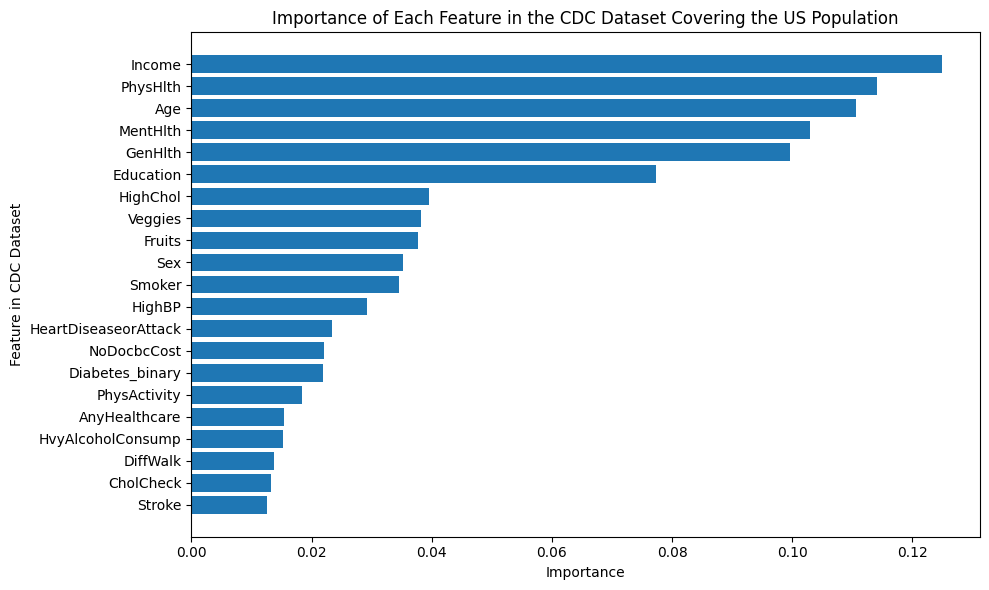

In [18]:
import matplotlib.pyplot as plt

y_cdc = np.ravel(y_cdc)

feature_importances_list = []
for train_index, test_index in stratified_k_fold_cdc.split(X_cdc, y_cdc):
    X_train, X_test = X_cdc[train_index], X_cdc[test_index]
    y_train, y_test = y_cdc[train_index], y_cdc[test_index]

    decision_tree_model_cdc.fit(X_train, y_train)

    feature_importances_list.append(decision_tree_model_cdc.feature_importances_)

average_feature_importances = np.mean(feature_importances_list, axis = 0)

for feature, importance in zip(feature_names_cdc, average_feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

feature_importances_df = pd.DataFrame({
    'Feature': feature_names_cdc,
    'Importance': average_feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_df['Feature'],
    feature_importances_df['Importance'],
    align='center'
)
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature in CDC Dataset')
plt.title('Importance of Each Feature in the CDC Dataset Covering the US Population')
plt.tight_layout()
plt.show()



As can be seen from the feature importance plot, the most important features for predicting obesity in the US population covered by the CDC dataset are factors like income, physical health, age, mental health, etc. 

#### **Latin America Dataset**

Feature: Gender, Importance: 0.0454
Feature: Age, Importance: 0.1607
Feature: family_history_with_overweight, Importance: 0.1746
Feature: eat_high_caloric, Importance: 0.0479
Feature: eat_vegetables, Importance: 0.0876
Feature: num_meals_per_day, Importance: 0.1399
Feature: food_between_meals, Importance: 0.0741
Feature: SMOKE, Importance: 0.0050
Feature: water_per_day, Importance: 0.0722
Feature: calories_per_day, Importance: 0.0017
Feature: physical_activity, Importance: 0.0603
Feature: technology_usage, Importance: 0.0700
Feature: alcohol_consumption, Importance: 0.0365
Feature: transportation_method, Importance: 0.0240


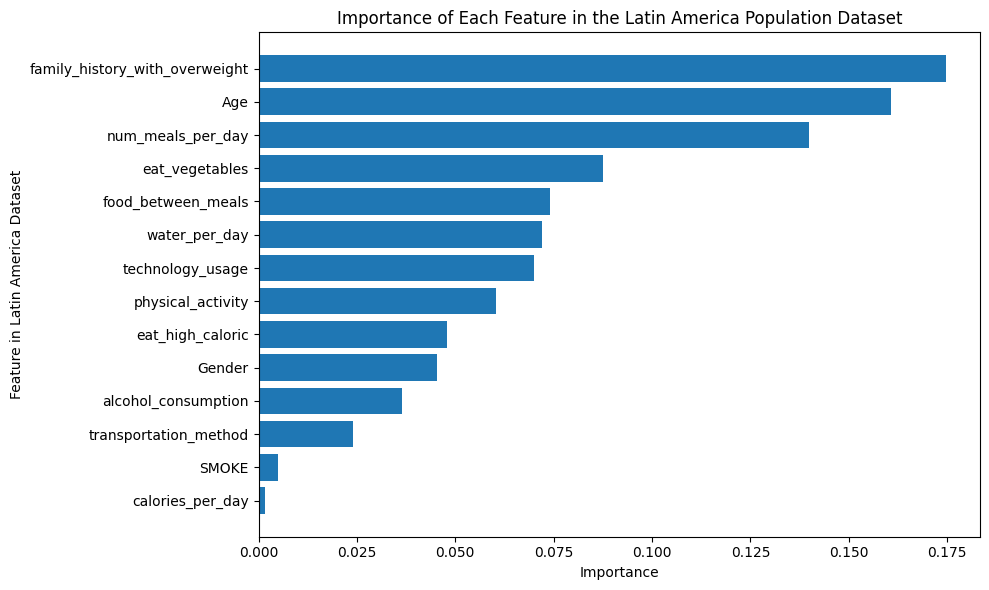

In [19]:

y_latin = np.ravel(y_latin)

feature_importances_list_latin = []
for train_index, test_index in stratified_k_fold_cdc.split(X_latin, y_latin):
    X_train, X_test = X_latin[train_index], X_latin[test_index]
    y_train, y_test = y_latin[train_index], y_latin[test_index]

    decision_tree_model_latin.fit(X_train, y_train)

    feature_importances_list_latin.append(decision_tree_model_latin.feature_importances_)

average_feature_importances_latin = np.mean(feature_importances_list_latin, axis = 0)

for feature, importance in zip(feature_names_latin, average_feature_importances_latin):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

feature_importances_df_latin = pd.DataFrame({
    'Feature': feature_names_latin,
    'Importance': average_feature_importances_latin
})

feature_importances_df_latin = feature_importances_df_latin.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(
    feature_importances_df_latin['Feature'],
    feature_importances_df_latin['Importance'],
    align='center'
)
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature in Latin America Dataset')
plt.title('Importance of Each Feature in the Latin America Population Dataset')
plt.tight_layout()
plt.show()


As can be seen from this feature importance plot, the most important features for predicting obesity in the Latin American Population (Mexico, Peru, Colombia) are having a family history with being overweight, age, number of meals per day, whether or not a person eats vegetables, etc. 

#### **Export Cleaned Dataframes to CSV**

In [ ]:
# df.to_csv('cdc_dataset_cleaned.csv', index = False)
# df_latin.to_csv('latin_america_dataset_cleaned.csv', index = False)